In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [73]:
file_path =  '../resources/raw_input_data/The_critique_of_pure_reason.txt'


f = open(file_path,"r")
text = f.read()
sent_text = nltk.sent_tokenize(text) # this gives us a list of sentences




At first, her government, under the administration of the _dogmatists_,
was an absolute _despotism_.


In [32]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [33]:
# Just tokenise text and add POS Tags

sent = preprocess(text)
sent

[('At', 'IN'),
 ('first', 'JJ'),
 (',', ','),
 ('her', 'PRP$'),
 ('government', 'NN'),
 (',', ','),
 ('under', 'IN'),
 ('the', 'DT'),
 ('administration', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('_dogmatists_', 'NNP'),
 (',', ','),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('absolute', 'JJ'),
 ('_despotism_', 'NN')]

(ROOT (S (At IN) (first JJ) (, ,) (her PRP$) (government NN) (, ,) (under IN) (the DT) (administration NN) (of IN) (the DT) (_dogmatists_ NNP) (, ,) (was VBD) (an DT) (absolute JJ) (_despotism_ NN)))


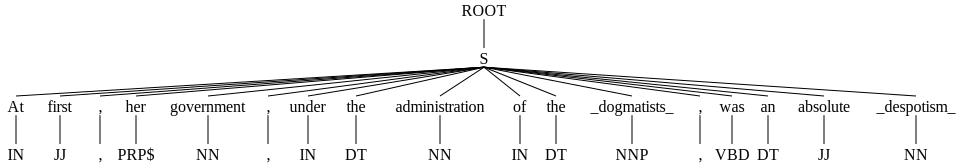

In [50]:
my_string = " ".join(str(element) for element in sent)
my_string = my_string.replace("'", "")
my_string = my_string.replace(", ", " ")

sentence = "(ROOT (S " + my_string + "))"
print(sentence)
word_tree = nltk.tree.Tree.fromstring(sentence)
word_tree
#word_tree


In [35]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
# used to chunck parts of sentences :) 


In [61]:
text

'The old oak tree from India fell down.'

In [63]:
import nltk 
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
from nltk import pos_tag, word_tokenize, RegexpParser 
   
# Example text 
   
# Find all parts of speech in above sentence 
tagged = pos_tag(word_tokenize(text)) 
   
#Extract all parts of speech from any text 
chunker = RegexpParser(""" 
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases 
                       P: {<IN>}               #To extract Prepositions 
                       V: {<V.*>}              #To extract Verbs 
                       PP: {<P> <NP>}          #To extract Prepostional Phrases 
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases 
                       """) 
  
# Print all parts of speech in above sentence 
output = chunker.parse(tagged) 
print("After Extracting\n", output) 


After Extracting
 (S
  (P At/IN)
  first/JJ
  ,/,
  her/PRP$
  (NP government/NN)
  ,/,
  (PP (P under/IN) (NP the/DT administration/NN))
  (P of/IN)
  the/DT
  _dogmatists_/NNP
  ,/,
  (VP (V was/VBD) (NP an/DT absolute/JJ _despotism_/NN)))


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dominikpichler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dominikpichler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [71]:
import nltk


is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(text)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

print(nouns)

['government', 'administration', '_dogmatists_', '_despotism_']


In [66]:
import nltk
s = my_string#'(ROOT (S (NP (NNP Europe)) (VP (VBZ is) (PP (IN in) (NP (DT the) (JJ same) (NNS trends)))) (. .)))'
#tree = nltk.tree.Tree.fromstring(s)

list_entity_relation_match = []

def traverse_tree(tree,pointer:list):
    list_valid_types = ["NNP","NNS"]
    tree = word_tree
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:

            if subtree.label() in list_valid_types:
                pointer.append(subtree.pop()) 
                
            else:
                traverse_tree(subtree,pointer)
        else:
            continue



def extract_noun_relationships(sentence: str) -> list:
    noun_list = []
    ER_list = []
    tree = ''
    #word_tree = nltk.tree.Tree.fromstring(sentence)        
    traverse_tree(tree,noun_list)
    ER_list.extend([noun_list, sentence])
    return ER_list


# What to do with multiple nouns? 
list_test = []
traverse_tree(output,list_test)
list_test
#extract_noun_relationships(s)



RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


In [ ]:
from nltk import pos_tag, word_tokenize
from nltk.chunk import ne_chunk

ne_tree = ne_chunk(pos_tag(word_tokenize(text)))
print((ne_tree))

In [ ]:
import pandas as pd
type(iob_tagged)
df = pd.DataFrame.from_records(iob_tagged)


In [ ]:
df